In [1]:
import time
import pandas as pd
import numpy as np
import math

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
def plotData(X: np.array, y: np.array) -> None:
    pos = X[y==1,:]
    neg = X[y==0,:]
    plt.scatter(pos[:,0],pos[:,1],marker='+',color='blue')
    plt.scatter(neg[:,0],neg[:,1],marker='o',color='red')

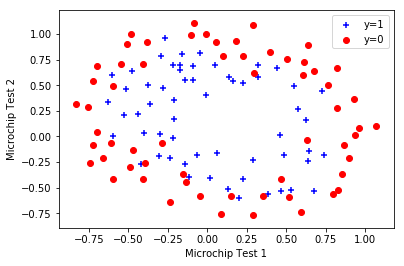

In [3]:
data = pd.read_csv('ex2Data2.txt',header=None) 
X = data.iloc[:,:2].values
y = data.iloc[:,2].values
m = len(y)
plotData(X,y)
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend(['y=1','y=0'])

Part 1: Regularized Logistic Regression

In [4]:
def mapFeature(X1: np.array, X2: np.array, degree: int = 6) -> np.array:
    m = len(X1)
    result = np.ones(m)
    for i in range(degree):
        for j in range(i+2):
            result = np.c_[result,np.power(X1,i-j+1)*np.power(X2,j)]
    return result
            

In [5]:
X = mapFeature(data.iloc[:,0].values, data.iloc[:,1].values)

In [6]:
def sigmoid(x: np.array) -> np.array:
    return 1/(1+np.exp(-x))
def costFunctionReg(theta: np.array, X: np.array, y: np.array, lambda_: float) -> (float, np.array):
    m = len(y)
    h = sigmoid(X.dot(theta))
    log_h = np.log(h)
    log_1_h = np.log(1-h)
    theta_bis = np.copy(theta)
    theta_bis[0] = 0
    J = 1/m *(-y.T.dot(log_h) - (1-y).T.dot(log_1_h)) + lambda_/(2*m)*theta_bis.T.dot(theta_bis)
    grad = 1/m * X.T.dot(h - y) + lambda_/m*theta_bis
    return J, grad

def costOnlyReg(theta: np.array, X: np.array, y: np.array, lambda_: float) -> float:
    m = len(y)
    h = sigmoid(X.dot(theta))
    log_h = np.log(h)
    log_1_h = np.log(1-h)
    theta_bis = np.copy(theta)
    theta_bis[0] = 0
    J = 1/m *(-y.T.dot(log_h) - (1-y).T.dot(log_1_h)) + lambda_/(2*m)*theta_bis.T.dot(theta_bis)
    return J

def gradientOnlyReg(theta: np.array, X: np.array, y: np.array, lambda_: float) ->  np.array:
    m = len(y)
    h = sigmoid(X.dot(theta))
    log_h = np.log(h)
    log_1_h = np.log(1-h)
    theta_bis = np.copy(theta)
    theta_bis[0] = 0
    grad = 1/m * X.T.dot(h - y) + lambda_/m*theta_bis
    return grad


In [7]:
m,n = np.shape(X)
initial_theta = np.zeros(n)
lambda_ = 1
cost, grad = costFunctionReg(theta=initial_theta, lambda_=lambda_, X=X, y=y)
print('Cost at initial theta (zeros): {:.3f}'.format( cost))
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros) - first five values only:\n')
np.set_printoptions(precision=4, suppress=True)
print(grad[:5])
print('Expected gradients (approx) - first five values only:\n');
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n');


Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros) - first five values only:

[ 0.0085  0.0188  0.0001  0.0503  0.0115]
Expected gradients (approx) - first five values only:

 0.0085
 0.0188
 0.0001
 0.0503
 0.0115



In [8]:
m,n = np.shape(X)
test_theta = np.ones(n)
test_lambda = 10
cost, grad = costFunctionReg(theta=test_theta, lambda_=test_lambda, X=X, y=y)
print('Cost at test theta (ones): {:.3f}'.format( cost))
print('Expected cost (approx): 3.16\n')
print('Gradient at initial theta (zeros) - first five values only:\n')
np.set_printoptions(precision=4, suppress=True)
print(grad[:5])
print('Expected gradients (approx) - first five values only:\n');
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n');

Cost at test theta (ones): 3.165
Expected cost (approx): 3.16

Gradient at initial theta (zeros) - first five values only:

[ 0.346   0.1614  0.1948  0.2269  0.0922]
Expected gradients (approx) - first five values only:

 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



Part 2: Regularization and Accuracies

In [9]:
def predict(theta: np.array, X: np.array) -> np.array:
    return np.int32(sigmoid(X.dot(theta))>=0.5)

In [10]:
def accuracy(theta: np.array, X: np.array, y: np.array) -> np.array:
    return np.mean(np.float32(y==predict(theta,X)))

In [11]:
import scipy.optimize as op
initial_theta = np.zeros(n)
lambda_ = 1
result = op.minimize(fun = costOnlyReg,x0 = initial_theta, args = (X, y,lambda_), method = 'TNC', jac = gradientOnlyReg)

In [12]:
# Same definition as in andrew ng course
def plotDecisionBoundary(theta: np.array, X: np.array, y: np.array) -> None:
    plotData(X[:,1:3],y)
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((len(u),len(v)))
    for i in range(len(u)):
        for j in range(len(v)):
            X1 = np.array([u[i]])
            X2 = np.array([v[j]])
            z[j,i] = mapFeature(X1, X2,).dot(theta)
    plt.contour(u,v,z,0)
    

In [13]:
# Written to take advantage of matrical calculation
def plotDecisionBoundary2(theta: np.array, X: np.array, y: np.array, cmapName: str, degree: int = 6) -> None:
    plotData(X[:,1:3],y)
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    uu, vv = np.meshgrid(u,v)
    X_ = mapFeature(X1=uu.reshape(len(u)*len(v)), X2=vv.reshape(len(u)*len(v)),degree=degree)
    z = X_.dot(theta).reshape((len(u),len(v)))
    plt.contour(u,v,z,0,cmap=plt.get_cmap(cmapName))

Time elapsed: 2170.707
Time elapsed: 18.599


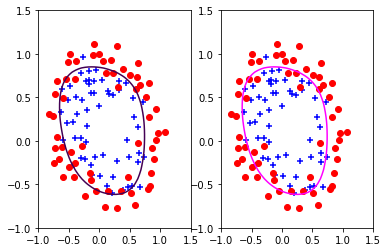

In [14]:
plt.subplot(121)
start = time.time()
plotDecisionBoundary(result.x, X, y)
end = time.time()
print('Time elapsed: {:.3f}'.format((end-start)*1000))
plt.subplot(122)
start = time.time()
plotDecisionBoundary2(result.x, X, y,'spring')
end = time.time()
print('Time elapsed: {:.3f}'.format((end-start)*1000))

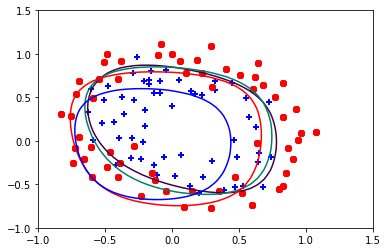

In [15]:
lambdas = [0.1,1,10,100]
cmaps = ['PRGn','summer','autumn','winter']
accuracies = np.zeros(len(lambdas))
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    initial_theta = np.zeros(n)
    result = op.minimize(fun = costOnlyReg,x0 = initial_theta, args = (X, y,lambda_), method = 'TNC', jac = gradientOnlyReg)
    plotDecisionBoundary2(result.x, X, y,cmaps[i])
    accuracies[i] = accuracy(result.x,X,y)

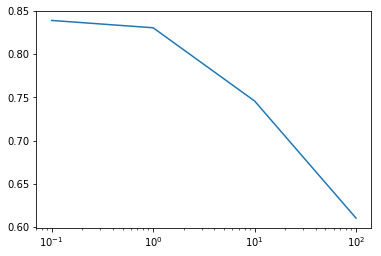

In [16]:
plt.plot(lambdas,accuracies)
plt.xscale('log')

Additional: Different degree

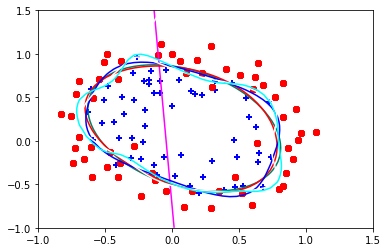

In [17]:
lambda_ = 0
cmaps = ['spring','summer','autumn','winter','Greys','cool']
degres = [d+1 for d in range(6)]
accuracies = np.zeros(len(degres))
for i in range(len(degres)):
    d = degres[i]
    X_d = mapFeature(data.iloc[:,0].values, data.iloc[:,1].values, degree=d)
    m,n = np.shape(X_d)
    initial_theta = np.zeros(n)
    result = op.minimize(fun = costOnlyReg,x0 = initial_theta, args = (X_d, y,lambda_), method = 'TNC', jac = gradientOnlyReg)
    plotDecisionBoundary2(result.x, X_d, y,cmaps[i],d)
    accuracies[i] = accuracy(result.x,X_d,y)

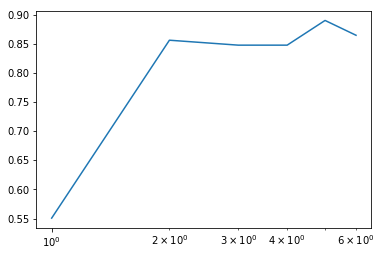

In [18]:
plt.plot(degres,accuracies)
plt.xscale('log')